# FORESEE - ALP with W couplings

### Load Libraries 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import os
#src_path = "/Users/felixkling/Documents/GitHub/FORESEE/"
src_path = "/Users/abraham/Documents/GitHub/roshanFORESEE/"
sys.path.append(src_path)
import time
from src.foresee import Foresee, Utility, Model

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:597: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [3]:
foresee = Foresee(path=src_path)

If ALPs with couplings to W bosons are sufficiently light, they are mainly produced via Kaon decay. To start, let us have a look at the Kaon spectrum in terms of the angle with respect to the beam axis $\theta$ and the momentum $p$. This can be done using the function `get_spectrumplot` which requires the MC particle ID (or simply pid), the MC generator and the energy. The units on the coloraxis are pb/bin. 

FORESEE provides the 2D spectrum as tables for a variety of particles ($\pi^0$, $\eta$, ...), generators (SIBYLL, EPOSLHC, QGSJET, PYTHIA) and collision energies (14, 27 and 100 TeV). The datafiles are stored in the directory `files/hadrons`. 

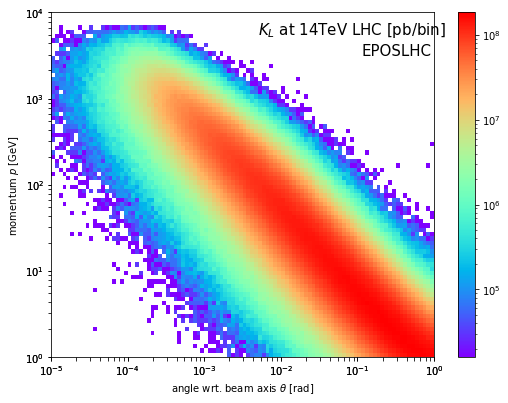

In [4]:
plot=foresee.get_spectrumplot(pid="130", generator="EPOSLHC", energy="14", prange=[[-5, 0, 100],[ 0, 4, 80]])
plot.text(-2.3,3.75, r"$K_L$ at 14TeV LHC [pb/bin]",fontsize=15,color="k",rotation=0)
plot.text(-0.95,3.5, r"EPOSLHC",fontsize=15,color="k",rotation=0)
plot.subplots_adjust(left=0.10, right=1.05, bottom=0.10, top=0.97)
#plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
plot.show()

## 2. Specifying the Model: ALP-W

The phenomenology of the ALP with $W$-couplings can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = - \frac{1}{2} m_{a}^2 a^2  - \frac{g_{aWW}}{4}a W^a_{\mu\nu} \tilde W^a_{\mu\nu}
\end{equation}

with the ALP mass $m_a$ and the coupling parameter $g_{aWW}$ as free parameters. For the search for ALPS at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of dark photons as function of those two parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [5]:
energy = "13.6"
modelname="ALP-W"
model = Model(modelname)

nsample_use = 100
nsample_use_B = 1000

generators = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']
generators_B = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']

**Production** Most LLPs are produced in the decay of primary particles. Here we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. We additionally specify the variable `nsample` which specifies how often each parent particle is decayed. 

For the ALP, we have the branching fractions (with $g = g_{aWW}\cdot GeV$)

\begin{equation}
    \text{BR}(K^+ \to \pi^+ a) = 10.5 \times g^2 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2}
\end{equation}
\begin{equation}
\text{BR}(K_L \to \pi^0 a) = 4.5 \times g^2 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2}
\end{equation}
\begin{equation}
\text{BR}(B \to X_s a)     = 2.3 \cdot 10^4 \times g^2 \times [(1-m_a^2/m_B^2)]^{2}
\end{equation}

In [6]:
model.add_production_2bodydecay(
    pid0 = "130",
    pid1 = "111",
    br = "4.5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.495**2)*(1-(mass-0.135)**2/0.495**2))",
    generator = generators,
    energy = energy,
    nsample = nsample_use
)
model.add_production_2bodydecay(
    pid0 = "321",
    pid1 = "211",
    br = "10.5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.495**2)*(1-(mass-0.135)**2/0.495**2))",
    generator = generators,
    energy = energy,
    nsample = nsample_use, 
)
model.add_production_2bodydecay(
    pid0 = "-321",
    pid1 = "211",
    br = "10.5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.495**2)*(1-(mass-0.135)**2/0.495**2))",
    generator = generators,
    energy = energy,
    nsample = nsample_use, 
) 

######################        
model.add_production_2bodydecay(
    pid0 = "511",
    pid1 = "130",
    br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
) 

model.add_production_2bodydecay(
    pid0 = "-511",
    pid1 = "130",
    br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
) 

model.add_production_2bodydecay(
    pid0 = "521",
    pid1 = "321",
    br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
) 

model.add_production_2bodydecay(
    pid0 = "-521",
    pid1 = "-321",
    br = "2.3e4 * coupling**2 * (1-(mass/5.279)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
)        

model.add_production_2bodydecay(
    pid0 = "531",
    pid1 = "333",
    br = "2.3e4 * coupling**2 * (1-(mass/5.366)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
) 

model.add_production_2bodydecay(
    pid0 = "-531",
    pid1 = "333",
    br = "2.3e4 * coupling**2 * (1-(mass/5.366)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
)   

model.add_production_2bodydecay(
    pid0 = "541",
    pid1 = "431",
    br = "2.3e4 * coupling**2 * (1-(mass/6.274)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
) 

model.add_production_2bodydecay(
    pid0 = "-541",
    pid1 = "-431",
    br = "2.3e4 * coupling**2 * (1-(mass/6.274)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
) 


model.add_production_2bodydecay(
    pid0 = "5122",
    pid1 = "3122",
    br = "2.3e4 * coupling**2 * (1-(mass/5.6202)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
)

model.add_production_2bodydecay(
    pid0 = "-5122",
    pid1 = "-3122",
    br = "2.3e4 * coupling**2 * (1-(mass/5.6202)**2)**2",
    generator = generators_B,
    energy = energy,
    nsample = nsample_use, 
)

In [7]:
# model.add_production_2bodydecay(
#     pid0 = "5122",
#     pid1 = "3122",
#     br = "2.3e4 * coupling**2 * (1-(mass/5.6202)**2)**2",
#     generator = generators_B,
#     energy = energy,
#     nsample = nsample_use, 
# )

# model.add_production_2bodydecay(
#     pid0 = "-5122",
#     pid1 = "-3122",
#     br = "2.3e4 * coupling**2 * (1-(mass/5.6202)**2)**2",
#     generator = generators_B,
#     energy = energy,
#     nsample = nsample_use, 
# )

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [8]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and brnaching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [9]:
branchings = [
    ["gamma_gamma", "black", "solid", r"$\gamma\gamma$", 0.1, 0.3],
    ["e_e_gamma", "blue", "solid", r"$ee\gamma$", 0.1, 0.02],
]
finalstates=[
    [22,22], [11,-11,22]
]
model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=finalstates,
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [10]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $m_{a}=300$ MeV and $g=10^{-5}$ using the function `foresee.get_llp_spectrum()`.  By default, the result are saved in the `model/LLP_spectra` directory. However, here set `save_file=False` since we don't want to save the results but set `do_plot=True` to plot them. 

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:491: RuntimeWarning: overflow encountered in exp
  if (theta < 0.017/ltas): probability = 1.- np.exp(- ltan/dbarz)
/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:685: RuntimeWarning: invalid value encountered in multiply
  w_decays = np.array([self.get_decay_prob(pid0, p_mother)*w_mother for w_mother, p_mother in zip(weights_mother,momenta_mother)])
/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:496: RuntimeWarning: overflow encountered in exp
  if (theta < 0.05/ltas): probability = 1.- np.exp(- ltas/dbarz)


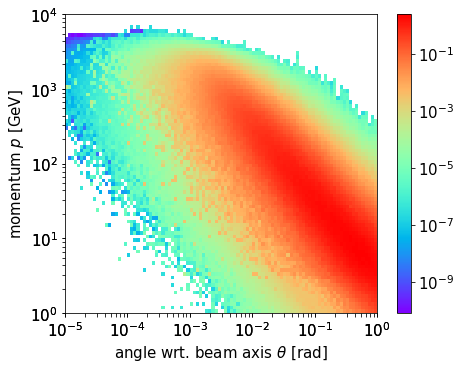

In [10]:
plt = foresee.get_llp_spectrum(0.3, coupling=10**(-5), do_plot=True, save_file=False)
plt.show()

We can now produce a set of LLP spectra for various masses and unit coupling and save them.  

In [9]:
masses = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

#masses = [0.01]
for mass in masses:
    foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.0126.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_0.0126.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_0.0126.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.0126.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_0.0126.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_0.0126.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.0158.npy
save data to file: ./model/LLP_spectra

save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.2512.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_0.2512.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_0.2512.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.2818.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_0.2818.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_0.2818.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.2818.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_0.2818.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_0.2818.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.3162.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_0.3162.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_0.3162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.3162.npy
save data to file: ./mode

save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.7943.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_0.7943.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_0.7943.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.7943.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_0.7943.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_0.7943.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.8128.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_0.8128.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_0.8128.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_0.8128.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_0.8128.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_0.8128.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_0.8318.npy
save data to file: ./model

save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_2.5119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_2.5119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_2.5119.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_2.8184.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_2.8184.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_2.8184.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_2.8184.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Max_m_2.8184.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8-Min_m_2.8184.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8_m_3.1623.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Max_m_3.1623.npy
save data to file: ./model/LLP_spectra/13.6TeV_5122_NLO-P8-Min_m_3.1623.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5122_NLO-P8_m_3.1623.npy
save data to file: ./mode

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

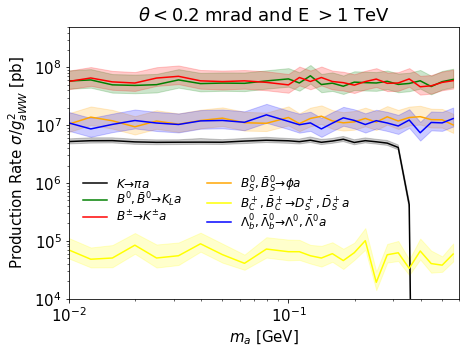

In [23]:
# productions=[
#      {"channels": ["130"], "color": "black", "label": r"$K_L \to \pi^0 a$", "generators": ["Pythia8-Forward","EPOSLHC","SIBYLL"]},
#      {"channels": ["321"], "color": "blue", "label": r"$K^+ \to \pi^+ a$", "generators": ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]},
#      {"channels": ["-321"], "color": "red", "label": r"$K^- \to \pi^- a$", "generators": ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]},

#      {"channels": ["511"], "color": "black", "label": r"$B^0 \to K^0 a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["-511"], "color": "blue", "label": r"$\bar{B}^0 \to K^0 a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["521"], "color": "red", "label": r"$B^+ \to K^+ a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["-521"], "color": "green", "label": r"$B^- \to K^- a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["531"], "color": "orange", "label": r"$B^0_S \to \phi a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["-531"], "color": "pink", "label": r"$\bar{B}^0_S \to \phi a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["541"], "color": "yellow", "label": r"$B^+_C \to D^+_S a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
#      {"channels": ["-541"], "color": "limegreen", "label": r"$\bar{B}^+_C \to \bar{D}^+_S a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},

    
# ]


productions=[
     {"channels": ["130","321","-321"], "color": "black", "label": r"$K \to \pi a$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},

     {"channels": ["511","-511"], "color": "green", "label": r"$B^0,\bar{B}^0 \to K_L a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
     
     {"channels": ["521","-521"], "color": "red", "label": r"$B^{\pm} \to K^{\pm} a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
     
     {"channels": ["531","-531"], "color": "orange", "label": r"$B^0_S,\bar{B}^0_S \to \phi a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
     
     {"channels": ["541","-541"], "color": "yellow", "label": r"$B^+_C,\bar{B}^+_C \to D^+_S,\bar{D}^+_S a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},

     {"channels": ["5122","-5122"], "color": "blue", "label": r"$\Lambda^0_b ,\bar{\Lambda}^0_b \to \Lambda^0,\bar{\Lambda}^0 a$", "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},

]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>3",  
#     xlims=[0.01,1.1],
#     ylims=[5e6,1e9],
#     xlims=[0.01,0.29],
#     ylims=[1e6,1e8], 
    xlims=[0.01,0.6],
    ylims=[1e4,5e8],     
    xlabel=r"$m_a$ [GeV]",
    ylabel=r"Production Rate $\sigma/g_{aWW}^2$ [pb]",
    legendloc=(0.75,0.5),
    fs_label=12,
    ncol=2,
)

# plot.title("Light Hadrons")
# plot.savefig("figures/"+modelname+"_lighthadrons_production_channels.pdf")

#plot.title("B Hadrons")
#plot.savefig("figures/"+modelname+"_B_production_channels.pdf")

plot.title(r"$\theta < 0.2$ mrad and E $> 1$ TeV")
plot.savefig("figures/"+modelname+"_production_channels_E1000.pdf")


## 4. Count Eventrate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. Here we use the default for 2022+2023 data. 

In [11]:
distance, selection, length, luminosity, channels = 476, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 3.5, 60, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one mass $m_{S}=300$ MeV and $g_{aW}=1\cdot 10^{-5}$ at how many particle decay inside the decay volume. The list `setups` defines three seups, with corresponding generators (for piopns and eta) and pT cuts (for Brem) specified in `modes`. 

In [12]:
setups = ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]
modes = {
        '130': ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"], 
         '321':["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"], 
         '-321':["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"], 
#          '511':['NLO-P8','NLO-P8-Max', 'NLO-P8-Min']
        }

         
output = foresee.get_events(mass=0.1, energy=energy, couplings=[5e-5], modes=modes)
coups, ctaus, nsigs, momenta, weights = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    print (nsig)
#     print ("coupling =", '{:5.3e}'.format(coup), setups, ": nsignal =", '{:5.3e}'.format(nsig))
    for i in range(len(nsig)): 
        print ("coupling =", '{:5.3e}'.format(coup), setups[i], ": nsignal =", '{:5.3e}'.format(nsig[i]))

[ 8.5207871   9.96392573 11.17427274  6.49334185]
coupling = 5.000e-05 Pythia8-Forward : nsignal = 8.521e+00
coupling = 5.000e-05 EPOSLHC : nsignal = 9.964e+00
coupling = 5.000e-05 QGSJET : nsignal = 1.117e+01
coupling = 5.000e-05 SIBYLL : nsignal = 6.493e+00


The previous function also outputs the energy distribution of the dark photons which decay inside the detector. Let's have a look at them.

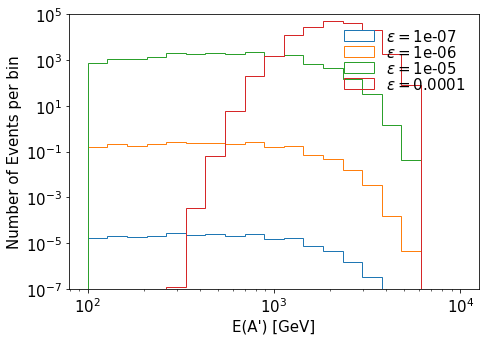

In [13]:
# fig = plt.figure(figsize=(7,5))
# ax = plt.subplot(1,1,1)
# for coup,momentum,weight in zip(coups,momenta,weights):
#     if sum(weight)<10**-5 : continue
#     ax.hist([p.e for p in momentum], weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$\epsilon=$"+str(coup)) 
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_ylim(10**-7,10**5) 
#     ax.set_xlabel("E(A') [GeV]") 
#     ax.set_ylabel("Number of Events per bin") 
#     ax.legend(frameon=False, labelspacing=0)
# plt.tight_layout()
# plt.show()

## 5. Parameter Scan

To get a sensitivity curve, we need to perform a paramerer scan loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later. Note that there are multiple files for different generators (this might be changed in the future). 

In [14]:
# masses = [ 
#     0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
#     0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
#     0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
#     0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
#     0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
#     0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
#     0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
#     1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
#     2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433   
# ]

masses = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
#     2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433   
]


In [37]:
#specify setup
luminosity, distance, length = 60 , 476, 3.5
setup, selection, channels = "default", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", None
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

#define setups and modes
# setups = ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET', 'P8-F+NLO-max', 'P8-F+NLO-min']
# modes = {
#          '130':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET','Pythia8-Forward','Pythia8-Forward'], 
#          '321':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET','Pythia8-Forward','Pythia8-Forward'], 
#          '-321':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET','Pythia8-Forward','Pythia8-Forward'],
#          '511':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '-511':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '521':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '-521':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '531':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '-531':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '541':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
#          '-541':['NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
# } 

setups = ['Pythia8-Forward+NLO', 'Pythia8-Forward+NLO-max', 'Pythia8-Forward+NLO-min']
modes = {
         '130':['Pythia8-Forward','Pythia8-Forward','Pythia8-Forward'], 
         '321':['Pythia8-Forward','Pythia8-Forward','Pythia8-Forward'], 
         '-321':['Pythia8-Forward','Pythia8-Forward','Pythia8-Forward'],
    
         '511':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '-511':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '521':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '-521':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '531':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '-531':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '541':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '-541':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '5122':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],
         '-5122':['NLO-P8', 'NLO-P8-max', 'NLO-P8-min'],    
} 

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",[masses,couplings,list_nevents[label]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [15]:
#specify setup
luminosity, distance, length = 60 , 476, 3.5
setup, selection, channels = "default", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", None
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

setups = ['Pythia8-Forward+NLO']
modes = {
         '130':['Pythia8-Forward'],
} 

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,11),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+"_boo.npy",[masses,couplings,list_nevents[label]])

/Users/abraham/.pyenv/versions/3.10.5/lib/python3.10/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [37]:
# setups = [ 
#     ["13.6TeV_default_Pythia8-Forward.npy" ,"Pythia8-Forward", "blue"     ,  "solid"  , 0., 3],    
# #     ["13.6TeV_default_EPOSLHC.npy",  "EPOSLHC"    , "red"        ,  "solid"  , 0., 3],
# #     ["13.6TeV_default_SIBYLL.npy" ,  "SYBILL"  , "magenta"    ,  "solid"  , 0., 3],
# #     ["13.6TeV_default_QGSJET.npy" ,"QGSJET", "orange"     ,  "solid"  , 0., 3],
    
#     ["13.6TeV_default_P8-F+NLO-max.npy" ,"P8-F+NLO-max", "blue"     ,  "dashed"  , 0., 3],    
#     ["13.6TeV_default_P8-F+NLO-min.npy" ,"P8-F+NLO-min", "blue"     ,  "dashdot"  , 0., 3],    


# ]

setups = [ 
    ["13.6TeV_default_Pythia8-Forward+NLO.npy" ,"Pythia8-Forward+NLO", "sienna"     ,  "solid"  , 0., 3],   
    ["13.6TeV_default_Pythia8-Forward+NLO-max.npy" ,"Pythia8-Forward+NLO-max", "tomato"     ,  "dotted"  , 0., 3],    
    ["13.6TeV_default_Pythia8-Forward+NLO-min.npy" ,"Pythia8-Forward+NLO-min", "maroon"     ,  "dashed"  , 0., 3],    


]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [38]:
# bounds = [   
#     ["bounds_SN1987.txt",      "SN1987",  0.100, 1.9*10**-7, 25  ],
#     ["bounds_E137.txt",        "E137",    0.100, 1.2*10**-6, -8  ],
#     ["bounds_LEP.txt",         "LEP",     4.000, 6.7*10**-4, 0   ],
#     ["bounds_E949_displ.txt",  "E949",    0.065, 9.0*10**-5, -9  ],
#     ["bounds_NA62_1.txt",      "NA62",    0.235, 4.5*10**-4, 90  ],
#     ["bounds_NA62_2.txt",      "NA62",    0.065, 9.2*10**-6, 2   ],
#     ["bounds_KOTO.txt",        "KOTO",    0.090, 3.4*10**-5, 2   ],
#     ["bounds_KTEV.txt",        "KTEV",    0.200, 4.5*10**-4, 90  ],
#     ["bounds_NA6264.txt",      "NA64",    0.270, 4.5*10**-4, 90  ],
#     ["bounds_E949_prompt.txt", "E949",    0.065, 3.0*10**-6, -5  ],
#     ["bounds_CDF.txt",         "CDF",     0.065, 7.5*10**-4, -12 ],
# ]


bounds = [   
    ["bounds_BaBar.txt",      "BaBar",    0.30, 9.0e-5, 0 ],
    ["bounds_SN1987.txt",      "SN1987",  0.065, 9.0e-7, 0  ],
    ["bounds_E137.txt",        "E137",    0.100, 1.2*10**-6, -8  ],
    ["bounds_LEP.txt",         "LEP",     0.650, 6.7*10**-4, 0   ],
    ["bounds_E949_displ.txt",  "E949",    0.065, 9.0*10**-5, -9  ],
    ["bounds_NA62_1.txt",      "NA62",    0.235, 8.5*10**-4, 90  ],
    ["bounds_NA62_2.txt",      "NA62",    0.065, 9.2*10**-6, 2   ],
    ["bounds_KOTO.txt",        "KOTO",    0.090, 3.4*10**-5, 2   ],
    ["bounds_KTEV.txt",        "KTEV",    0.200, 4.5*10**-4, 90  ],
    ["bounds_NA6264.txt",      "+ NA48/2",    0.270, 4.5*10**-4, 90  ],
    ["bounds_E949_prompt.txt", "E949",    0.065, 3.0*10**-6, -5  ],
    ["bounds_CDF.txt",         "CDF",     0.065, 7.5*10**-4, -12 ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [39]:
# projections = [
#     ["limits_Belle2-3gamma.txt",   "royalblue",   r"Belle2 $3\gamma$"  , 1.400, 1.7*10**-4, 0  ],
#     ["limits_KOTO-2gamma.txt",     "cyan",        r"KOTO $2\gamma$"    , 0.060, 2.0*10**-4, 0  ],
#     ["limits_KOTO-4gamma.txt",     "blue",        r"KOTO $4\gamma$"    , 0.370, 3.0*10**-4, 0  ],
#     ["limits_NA62-0gamma1.txt",    "dodgerblue",  r"NA62 $0\gamma$"    , 0.220, 2.0*10**-5, 0  ],
#     ["limits_NA62-0gamma2.txt",    "dodgerblue",  None                 , 0    , 0         , 0  ],
#     ["limits_NA62-2gamma.txt",     "deepskyblue", r"NA62 $2\gamma$"    , 0.370, 1.0*10**-4, 0  ],
#     ["limits_LHC.txt",             "teal",        r"LHC $Z\to3\gamma$" , 2.500, 3.5*10**-6, 0  ],
# ]


projections = [
    ["limits_Belle2-3gamma.txt",   "royalblue",   r"Belle2 $3\gamma$"+ "\n" +r"50ab$^{-1}$"  , 0.450, 2.1e-4, 0  ],
    ["limits_KOTO-2gamma.txt",     "cyan",        r"KOTO $2\gamma$"    , 0.090, 2.4e-4, 0  ],
    ["limits_KOTO-4gamma.txt",     "blue",        r"KOTO $4\gamma$"    , 0.115, 3.2e-4, 0  ],
    ["limits_NA62-0gamma1.txt",    "dodgerblue",  r"NA62 $0\gamma$"    , 0.220, 2.0e-5, 0  ],
    ["limits_NA62-0gamma2.txt",    "dodgerblue",  None                 , 0    , 0         , 0  ],
    #["limits_NA62-2gamma.txt",     "deepskyblue", r"NA62 $2\gamma$"    , 0.370, 1.0*10**-4, 0  ],
    ["limits_LHC.txt",             "teal",        r"LHC $Z\to3\gamma$" , 0.650, 5e-6, 0  ],
]


Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

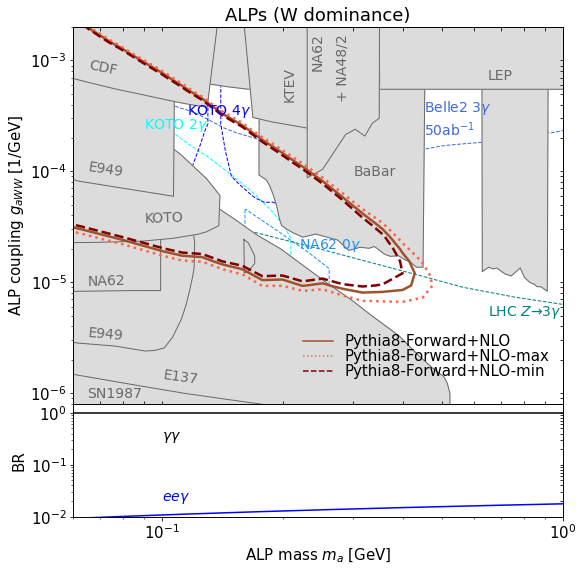

In [42]:
# plot = foresee.plot_reach(
#     setups=setups,
#     bounds=bounds,
#     projections=projections,
#     title="ALPs (W dominance)", 
#     xlims = [0.06,6], 
#     ylims=[10**-7.5,0.002],
#     xlabel=r"ALP mass $m_{a}$ [GeV]", 
#     ylabel=r"ALP coupling $g_{aW}$ [1/GeV]",
#     legendloc=(1,0.68),
#     figsize=(8,6),
# )

# plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
# #plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
# plot.show()

plot, ax1, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    branchings=branchings,
    title="ALPs (W dominance)", 
    linewidths=2.5,
#     xlims = [0.06,6], 
#     ylims=[10**-7.5,0.002],
    xlims = [0.06,1], 
    ylims=[8e-7,0.002],    
    xlabel=r"ALP mass $m_{a}$ [GeV]", 
    ylabel=r"ALP coupling $g_{aWW}$ [1/GeV]",
    legendloc=(1,0.22),
    figsize=(8,8),
)

# Adding additional ticks on x axis in top panel to match bottom panel
ax1.set_xticks([6e-2, 7e-2, 8e-2, 9e-2, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1, 1e0])


# Adding x-axis on top side
xlims = [0.06,1]
axes2 = ax1.twiny()   # mirror them
axes2.set_xlim(xlims[0],xlims[1])
axes2.set_xscale("log")
axes2.set_xticks([6e-2, 7e-2, 8e-2, 9e-2, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1, 1e0])
axes2.tick_params(axis="x",direction="in", pad=0)
axes2.set_xticklabels("")
axes2.set_xlabel("")

# Adding y-axis on right side
ylims = [8e-7,0.002]
axes2 = ax1.twinx()   # mirror them
axes2.set_ylim(ylims[0],ylims[1])
axes2.set_yscale("log")
axes2.set_yticks([8e-7, 9e-7,
                  1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6, 
                  1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
                  1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
                  1e-3, 2e-3])
axes2.tick_params(axis="y",direction="in", pad=0)
axes2.set_yticklabels("")
axes2.set_ylabel("")

# Adding y-axis on right side bottom panel
ylims = [0.02,1.5]
axes2 = ax2.twinx()   # mirror them
axes2.set_ylim(ylims[0],ylims[1])
axes2.set_yscale("log")
axes2.set_yticks([1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
                  1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
                  1e0])
axes2.tick_params(axis="y",direction="in", pad=0)
axes2.set_yticklabels("")
axes2.set_ylabel("")


plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("figures/"+modelname+"_Pythia.pdf")
#plot.savefig("figures/"+modelname+".pdf")
plot.show()